In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# for models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import TargetEncoder,StandardScaler

# metrics
from sklearn.metrics import mean_absolute_error,r2_score

In [441]:
df = pd.read_csv("/content/dataset.csv")

df

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


In [442]:
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [443]:
num_col = ['year','cylinders','mileage','doors']

cat_col = ['make','model','engine','fuel','transmission','trim','body','exterior_color','interior_color','drivetrain']
df.dtypes[df.dtypes == 'O']

,0
name,object
description,object
make,object
model,object
engine,object
fuel,object
transmission,object
trim,object
body,object
exterior_color,object


**handling outlier in numerical data**

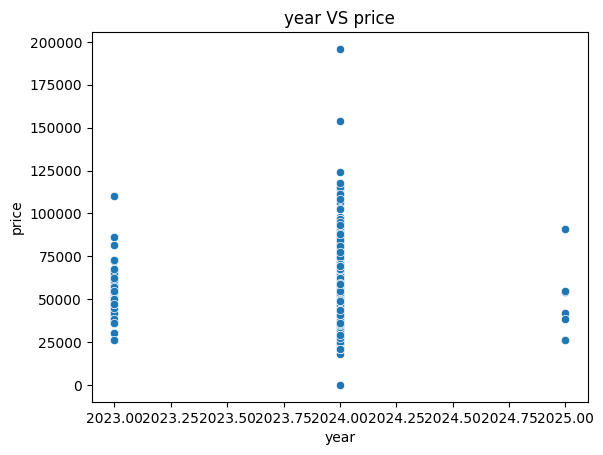

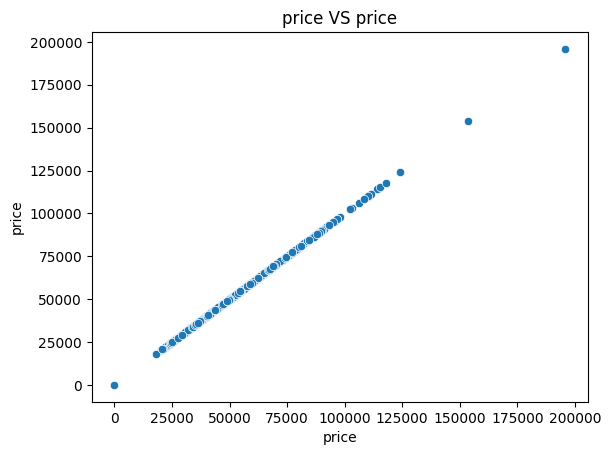

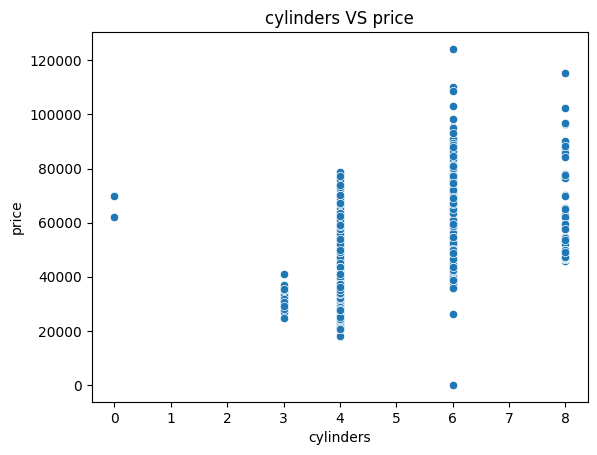

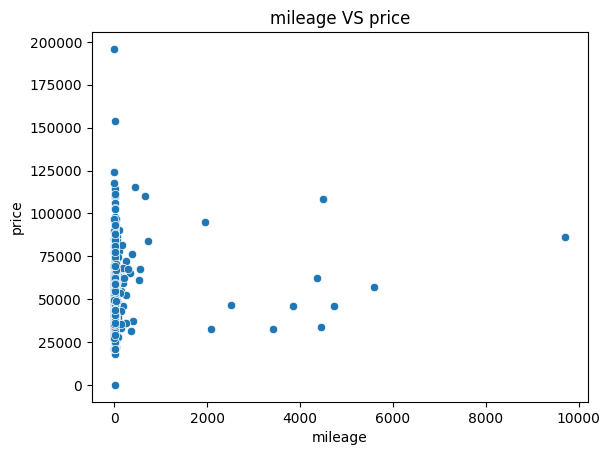

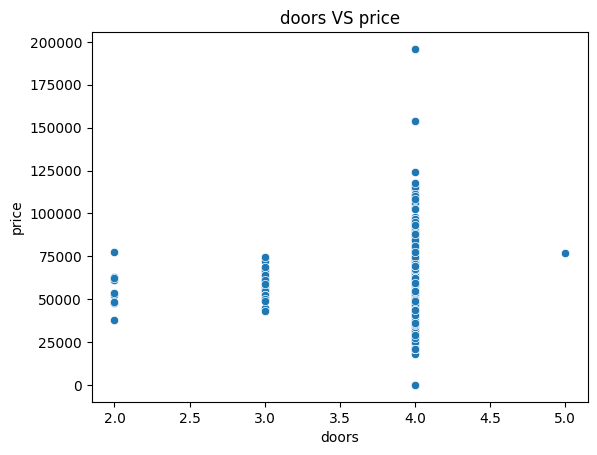

In [444]:
# sns.scatterplot(data=df,x='year',y='price')
# sns.scatterplot(data=df,x='cylinders',y='price')
# sns.scatterplot(data=df,x='mileage',y='price')


for i in df.dtypes[df.dtypes != 'O'].index:
  sns.scatterplot(data=df,x=df[i],y='price')
  plt.title(f"{i} VS price")
  plt.show()

In [445]:
df.query('year > 2024.75') #685,893,524,614,857,914

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
524,2025 BMW X7 xDrive40i,2025 BMW X7 xDrive40i,BMW,X7,2025,90945.0,24V DOHC,6.0,Gasoline,4.0,8-Speed Automatic,xDrive40i,SUV,4.0,Aventurin Red Metallic,Black,All-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
685,2025 Ford Explorer Platinum,\n \n DON'T MISS THIS DEAL Call 94...,Ford,Explorer,2025,53915.0,<dt>VIN</dt>\n 1FMUK7HH1SGA05728,4.0,Gasoline,8.0,10-Speed Automatic,Platinum,SUV,4.0,Star White Metallic Tri-Coat,Mojave Dusk/Onyx,Rear-wheel Drive
857,2025 Chevrolet Trax ACTIV,\n \n See what's behind you with t...,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,\n \n WHY BUY FROM US?Our dealersh...,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
914,2025 Mazda CX-70 3.3 Turbo S Premium,\n \n This 2025 Mazda CX-70 3.3 Tu...,Mazda,CX-70,2025,54620.0,o,6.0,Gasoline,0.0,8-Speed Automatic,3.3 Turbo S Premium,SUV,4.0,41w,Red,All-wheel Drive


In [446]:
df.query('cylinders < 1') #137,925

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,NaN,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
925,2023 Volvo C40 Recharge Pure Electric Twin Ult...,\n \n This Volvo C40 Recharge Pure...,Volvo,C40 Recharge Pure Electric,2023,62240.0,c Motor,0.0,Electric,0.0,Automatic,Twin Ultimate,SUV,4.0,Gray,Charcoal,All-wheel Drive


In [447]:
df.query('mileage > 8000') #371

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
371,2023 Jeep Wagoneer L Series III,"\n \n Premium Group I,Preferred Eq...",Jeep,Wagoneer L,2023,86097.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,9711.0,8-Speed Automatic,Series III,SUV,4.0,Riverrock Green,Sea Salt,Four-wheel Drive


In [448]:
df.query('doors > 4.5') #726

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Contact our Sales Team at(708)342-0400 for mo...,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [449]:
df.query('price > 130000') #323,884

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
323,2024 Audi RS e-tron GT quattro,Be sure to mention that you've seen this vehic...,Audi,RS e-tron GT,2024,153690.0,c ZEV,NaN,Electric,10.0,1-Speed Automatic,quattro,Sedan,4.0,Tactical Green Metallic,Black,All-wheel Drive
884,2024 BMW i7 M70,"\n \n Heated/Cooled Leather Seats,...",BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive


In [450]:
drop_index = [323,884,726,371,137,925,685,893,524,614,857,914]
print(df.shape)
df = df.drop(drop_index)
print(df.shape)

(1002, 17)
(990, 17)


**handling missing value**

In [451]:
missingdf = df.isnull().sum()
missingdf

,0
name,0
description,55
make,0
model,0
year,0
price,23
engine,1
cylinders,101
fuel,6
mileage,34


In [452]:
for i in missingdf.index:
    if df[i].dtype == 'O':
      df[i].fillna('No',inplace=True)
    else:
      df[i].fillna(0,inplace=True)

<ipython-input-452-4f090ab54225>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('No',inplace=True)
<ipython-input-452-4f090ab54225>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

In [453]:
# droping name and description
# df.drop(columns=['name','description'],inplace=True)
df.isnull().sum()
# df.columns

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


**Handling categorical values**

In [454]:
catVar = df.dtypes[df.dtypes == 'O']

for i in catVar.index:
  if i not in ['name','description']:
    print(f"{i} : {df[i].nunique()} \n")

make : 27 

model : 148 

engine : 95 

fuel : 8 

transmission : 38 

trim : 192 

body : 9 

exterior_color : 258 

interior_color : 89 

drivetrain : 4 



In [455]:
# Droping name and description :
df.drop(columns=['name','description'],inplace=True)
df

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


**Building Pipelines**

In [456]:
# i found out that our target feature has 23 nan value
# print(df.shape)
# df = df.dropna(subset=['price'])
# print(df.shape)
# print(df['price'].isnull().sum())

# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [457]:
numcol = df.select_dtypes(include=['int64','float64']).columns.tolist()
catCol =  df.select_dtypes(include='object').columns.tolist()
numcol.remove('price')
catCol

['make',
 'model',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

In [458]:
# numcol_pip = Pipeline(steps=[
#     ('impute',SimpleImputer(strategy='mean')),
#     ('scaler',StandardScaler())
# ])

In [459]:
# catCol_pip = Pipeline(steps=[
#     ('impute',SimpleImputer(strategy='most_frequent')),
#     ('encodeing',TargetEncoder()),
# ])

In [460]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

encoder = TargetEncoder()

for col in catCol:
    X_train_encoded[col] = encoder.fit_transform(X_train[[col]], y_train)
    X_test_encoded[col] = encoder.transform(X_test[[col]])

# error alert target encoding bare pad gaya
X_train_encoded

,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
760,0.036513,0.020537,2023,0.020537,4.0,0.024679,4.0,0.038672,0.000000,0.000000,4.0,0.020537,0.097175,0.000000
216,0.000000,0.000000,2024,0.000000,4.0,0.019467,10.0,0.030849,0.000000,0.018269,4.0,0.000000,0.027663,0.000000
295,0.039585,0.063984,2024,0.030588,4.0,0.011050,10.0,0.041176,0.120305,0.018440,4.0,0.000000,0.030178,0.031206
49,0.000000,0.000000,2024,0.036593,0.0,0.033602,14.0,0.000000,0.022082,0.020093,4.0,0.000000,0.000000,0.061509
727,0.020439,0.049687,2024,0.000000,6.0,0.000000,6.0,0.012855,0.000000,0.019822,4.0,0.000000,0.028545,0.009642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.000000,2024,0.000000,8.0,0.023693,148.0,0.014221,0.000000,0.009668,4.0,0.000000,0.000000,0.014310
271,0.040148,0.000000,2024,0.065852,6.0,0.024330,5.0,0.044764,0.000000,0.020219,4.0,0.018919,0.025628,0.014310
868,0.008448,0.000000,2024,0.000000,6.0,0.027012,4.0,0.041058,0.000000,0.015741,4.0,0.000000,0.000000,0.009642
438,0.000000,0.000000,2024,0.000000,4.0,0.024679,15.0,0.000000,0.000000,0.017588,4.0,0.020537,0.000000,0.000000


In [461]:
# X_train_encoded['model'].unique()

In [462]:
# col_tran = ColumnTransformer(transformers=[
#     ('numcol',numcol_pip,numcol),
# ],remainder='passthrough',n_jobs=-1)

In [463]:
# preprocess = Pipeline(steps=[
#     ('col_tran',col_tran)
# ])

In [464]:
# X_train_preprocessed = preprocess.fit_transform(X_train_encoded)
# X_test_preprocessed = preprocess.transform(X_test_encoded)
# X_train_preprocessed

In [465]:
# modelrf = RandomForestRegressor(n_estimators=100,random_state=42)
# modelrf.fit(X_train_preprocessed,y_train)
# yp_rf = modelrf.predict(X_test_preprocessed)
# mae = mean_absolute_error(y_test,yp_rf)
# r2 = r2_score(y_test,yp_rf)
# r2

**Model Traning**

In [466]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.model_selection")


In [467]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder

# Setting up the numeric and categorical pipelines
numcol_pip = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

catCol_pip = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encodeing', TargetEncoder())
])

col_tran = ColumnTransformer(transformers=[
    ('numcol', numcol_pip, numcol),
    ('catcol', catCol_pip, catCol)
], remainder='passthrough')  # Removed n_jobs=-1 for consistency

preprocess = Pipeline(steps=[
    ('col_tran',col_tran)
])



# Combining preprocessor and model into a pipeline
models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', col_tran),
        ('model', LinearRegression())
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', col_tran),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "XGBoost": Pipeline(steps=[
        ('preprocessor', col_tran),
        ('model', XGBRegressor(random_state=42, seed=42))  # Setting seed for reproducibility
    ]),
    "Gradient Boosting": Pipeline(steps=[
        ('preprocessor', col_tran),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
}

# Setting up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Evaluate each model using cross-validation
# for model_name, model_pipeline in models.items():
#     scores = cross_val_score(model_pipeline, X, y, cv=kfold, scoring='r2')
#     print(f"{model_name} R2 Score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


In [468]:
import pickle
# Train all models before saving
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the pipeline with preprocessed data
    yp = model.predict(X_test)
    r2 = r2_score(y_test,yp)
    print(f"{name} : {r2}")
    # Save each model as a separate .pkl file
    with open(f'{name.replace(" ", "_")}.pkl', 'wb') as f:
        pickle.dump(model, f)

    print(f"{name} model saved successfully as {name.replace(' ', '_')}.pkl")

Linear Regression : -199.10204470930884
Linear Regression model saved successfully as Linear_Regression.pkl
Random Forest : 0.656351172669851
Random Forest model saved successfully as Random_Forest.pkl
XGBoost : 0.598425164553713
XGBoost model saved successfully as XGBoost.pkl
Gradient Boosting : 0.6250724211344876
Gradient Boosting model saved successfully as Gradient_Boosting.pkl


In [469]:
# modelLr = LinearRegression()
# modelLr.fit(X_train_preprocessed,y_train)
# yp_lr = modelLr.predict(X_test_preprocessed)
# mae = mean_absolute_error(y_test,yp_lr)
# r2 = r2_score(y_test,yp_lr)
# r2

In [470]:
# modelgb = GradientBoostingRegressor(random_state=42)
# modelgb.fit(X_train_preprocessed,y_train)
# yp_gb = modelgb.predict(X_test_preprocessed)
# mae = mean_absolute_error(y_test,yp_gb)
# r2 = r2_score(y_test,yp_gb)
# r2

In [471]:
# modelxg = XGBRegressor(random_state=42)
# modelxg.fit(X_train_preprocessed,y_train)
# yp_xg = modelxg.predict(X_test_preprocessed)
# mae = mean_absolute_error(y_test,yp_xg)
# r2 = r2_score(y_test,yp_xg)
# r2

In [472]:
#question to ask
# 1. how to encode categorical var i used target
# 2. why my model is giving diff score in each run